In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
epilepsy = "epilepsy/aaaaaanr_s001_t001.edf"
no_epilepsy = "no_epilepsy/aaaaaebo_s002_t002.edf"

In [3]:
raw1 = mne.io.read_raw_edf(epilepsy, preload=True)
raw2 = mne.io.read_raw_edf(no_epilepsy, preload=True)

Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy\aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\no_epilepsy\aaaaaebo_s002_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 297499  =      0.000 ...  1189.996 secs...


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\PC\AppData\Local\Temp\ipykernel_11440\811669422.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw1.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
d:\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Using qt as 2D backend.



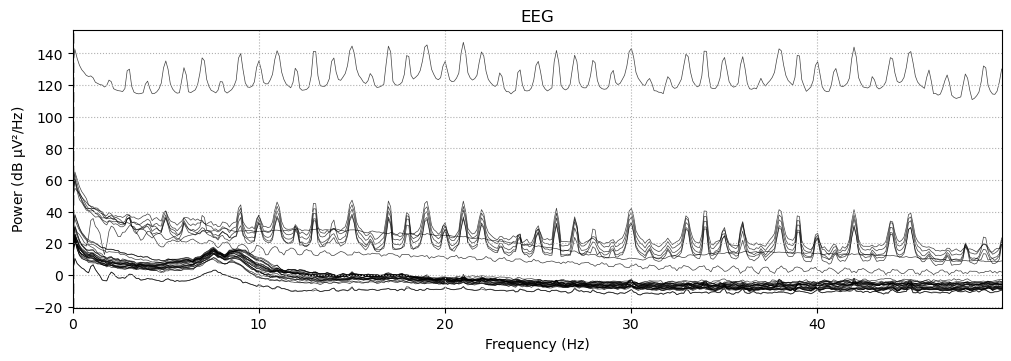

In [4]:
raw1.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw1.plot(duration=5, n_channels=raw1.info["nchan"])
print()

In [5]:
raw1.filter(1, None, method='iir')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 1.00 Hz: -6.02 dB



Measurement date,"January 01, 2003 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaanr
Digitized points,Not available
Good channels,33 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,125.00 Hz


In [6]:
raw1.plot()
print()

In [7]:
raw2.filter(1,None, method='iir')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 1.00 Hz: -6.02 dB



Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaebo
Digitized points,Not available
Good channels,36 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,125.00 Hz


In [8]:
raw2.plot()
print()

In [9]:
raw1.filter(1,50, method="iir")
raw2.filter(1,50, method="iir")

# raw1.notch_filter(freqs=[5], method='iir')
# raw2.notch_filter(freqs=[5], method='iir')

raw1.notch_filter(freqs=[5, 10, 15, 20], method='fir')
raw2.notch_filter(freqs=[5, 10, 15, 20], method='fir')

ica = mne.preprocessing.ICA(n_components=4, max_iter='auto', random_state=0)
ica.fit(raw1)
ica.apply(raw1)

ica.fit(raw2)
ica.apply(raw2)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 33 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 1.7s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 33 PCA components
Fitting ICA to data using 36 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_11440\2157710777.py:11: RuntimeWarning: Using n_components=4 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (4.3e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw1)


Selecting by number: 4 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 36 PCA components


Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaebo
Digitized points,Not available
Good channels,36 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


In [10]:
raw1.crop(tmin=2)
raw2.crop(tmin=2)


Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaebo
Digitized points,Not available
Good channels,36 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


In [11]:
channel_index = 4


In [13]:
channel_data_1 = raw1.get_data(picks=[channel_index])
channel_data_2 = raw2.get_data(picks=[channel_index])

In [14]:
time_points1 = raw1.times
time_points2 = raw2.times

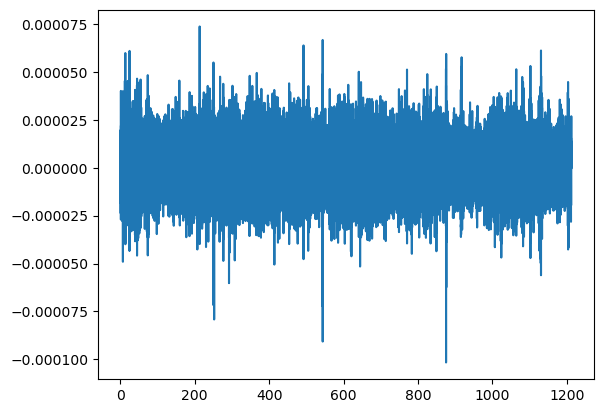

In [15]:
plt.plot(time_points1, channel_data_1[0])
plt.show()

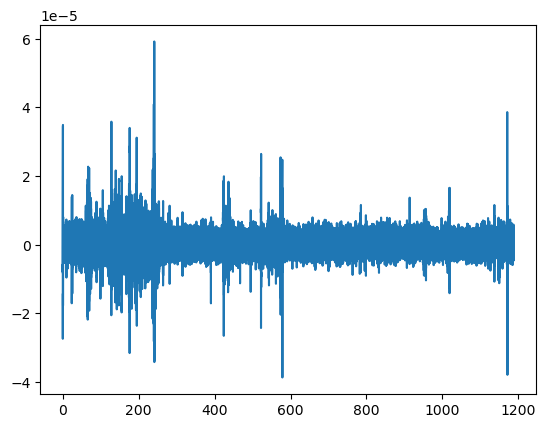

In [16]:
plt.plot(time_points2, channel_data_2[0])
plt.show()

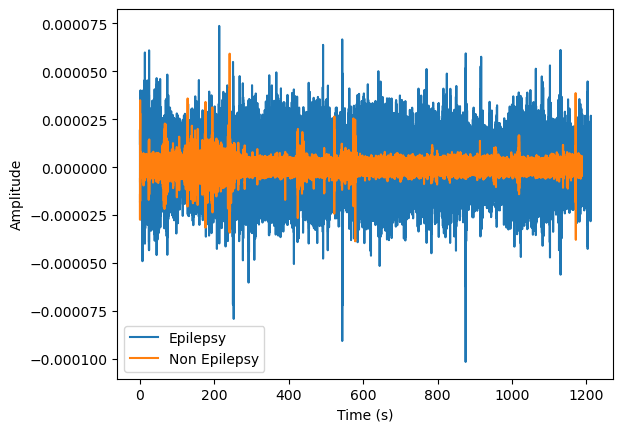

In [17]:
plt.plot(time_points1, channel_data_1[0], label=f"Epilepsy")
plt.plot(time_points2, channel_data_2[0], label=f"Non Epilepsy")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.legend()
plt.show()

**#VARIANCE**

In [15]:
window_size = 10

In [16]:
def windowed_variance(data, window_size):
  if window_size < 1:
    raise ValueError("Window size must be a positive integer.")
  if len(data) < window_size:
    raise ValueError("Data length must be greater than or equal to window size.")

  # Initialize the variance array
  variance = np.zeros(len(data) - window_size + 1)

  # Calculate variance for the first window
  variance[0] = np.var(data[:window_size])

  # Slide the window and calculate variance efficiently
  for i in range(1, len(data) - window_size + 1):
    # Efficiently update variance using previous calculation
    new_data_point = data[i + window_size - 1]
    old_data_point = data[i - 1]
    variance[i] = variance[i - 1] + (new_data_point**2 - old_data_point**2) / window_size

  return variance

In [17]:
variance_epilepsy = windowed_variance(channel_data_1[0], window_size)

In [18]:
print(variance_epilepsy[:10])

[ 4.53068811e-12  5.69010266e-12  6.15499822e-12  5.23841516e-12
  2.95382258e-12 -2.62064329e-14 -2.80735910e-12 -4.74426038e-12
 -5.66566469e-12 -5.75871080e-12]


In [19]:
variance_no_epilepsy = windowed_variance(channel_data_2[0], window_size)

In [20]:
print(variance_no_epilepsy[:10])

[7.37339658e-14 1.63225753e-13 2.70741868e-13 3.96351010e-13
 5.40133321e-13 7.02180378e-13 8.82595188e-13 1.08149219e-12
 1.29899722e-12 1.53524756e-12]


**#MNE**

In [5]:
raw1 = mne.io.read_raw_edf(epilepsy, preload=True)

Extracting EDF parameters from d:\FGW\EDF\v2.0.1\00_epilepsy\aaaaaanr\s001_2003\02_tcp_le\aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...


In [6]:
dir(raw1)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',


In [7]:
raw1.time_as_index

<bound method BaseRaw.time_as_index of <RawEDF | aaaaaanr_s001_t001.edf, 33 x 303500 (1214.0 s), ~76.4 MB, data loaded>>

In [8]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [9]:
ica.fit(raw1.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 33 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.3s.


C:\Users\PC\AppData\Local\Temp\ipykernel_7404\3458959172.py:1: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (2.1e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw1.copy().filter(8,35))


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,50 iterations on raw data (303500 samples)
ICA components,20
Available PCA components,33
Channel types,eeg
ICA components marked for exclusion,—


In [12]:
#ica.plot_components(outlines = "skirt")

In [13]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [17]:
from pathlib import Path
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [26]:
raw1.crop(tmax=10.0)

Measurement date,"January 01, 2003 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaanr
Digitized points,Not available
Good channels,33 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [24]:
original_raw = raw1.copy()
raw1.apply_hilbert()
print(
    f"original data type was {raw1.get_data().dtype}, after "
    f"apply_hilbert the data type changed to {raw1.get_data().dtype}."
)

original data type was complex128, after apply_hilbert the data type changed to complex128.


In [25]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick("eeg")  # selects only the EEG channels
print(f'after picking, it has {original_raw.info["nchan"]} channels.')

original data had 33 channels.
after picking, it has 33 channels.


In [29]:
print(f'original data had {raw1.info["nchan"]} channels.')
raw1.pick("eeg")  # selects only the EEG channels
print(f'after picking, it has {raw1.info["nchan"]} channels.')

original data had 33 channels.
after picking, it has 33 channels.


In [30]:
print(f'original data had {raw2.info["nchan"]} channels.')
raw2.pick("eeg")  # selects only the EEG channels
print(f'after picking, it has {raw2.info["nchan"]} channels.')

original data had 36 channels.
after picking, it has 36 channels.


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


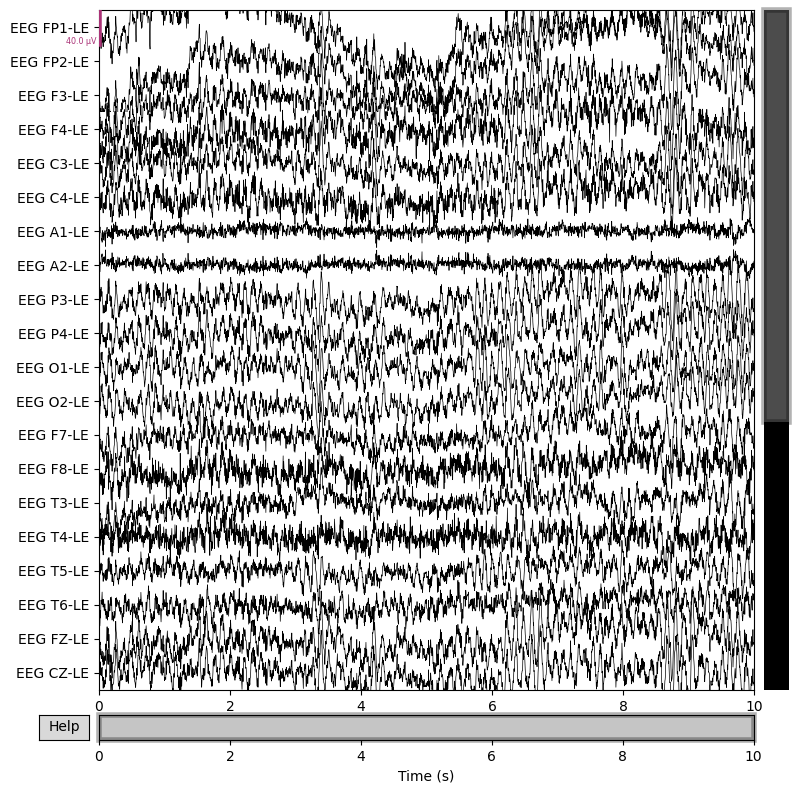

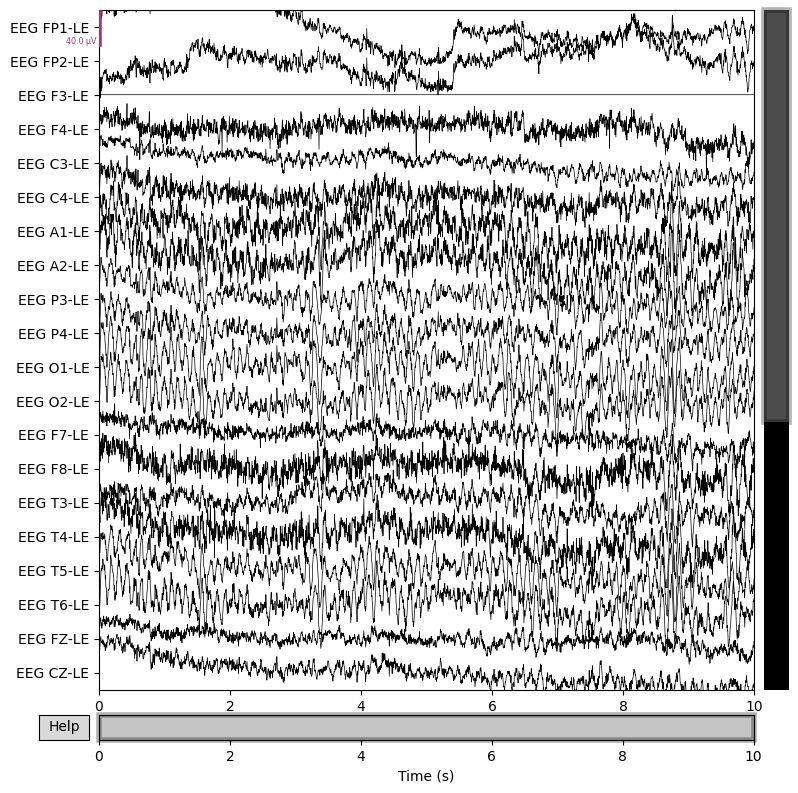

In [38]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ["EEG F3-LE"], copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()

In [44]:
print(raw2.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
